Sample submission
Submission shape: (20, 2)
Train set: where the 'features' live
Train shape: (3960, 82)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test set: what we will evaluate our models on
Test shape: (20, 59)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Dictionary: what each feature means
Data Dictionary shape: (81, 6)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


Removed 1241 rows with 'Missing' SII values.
Train shape: (2719, 83)
Duplicate rows: 0


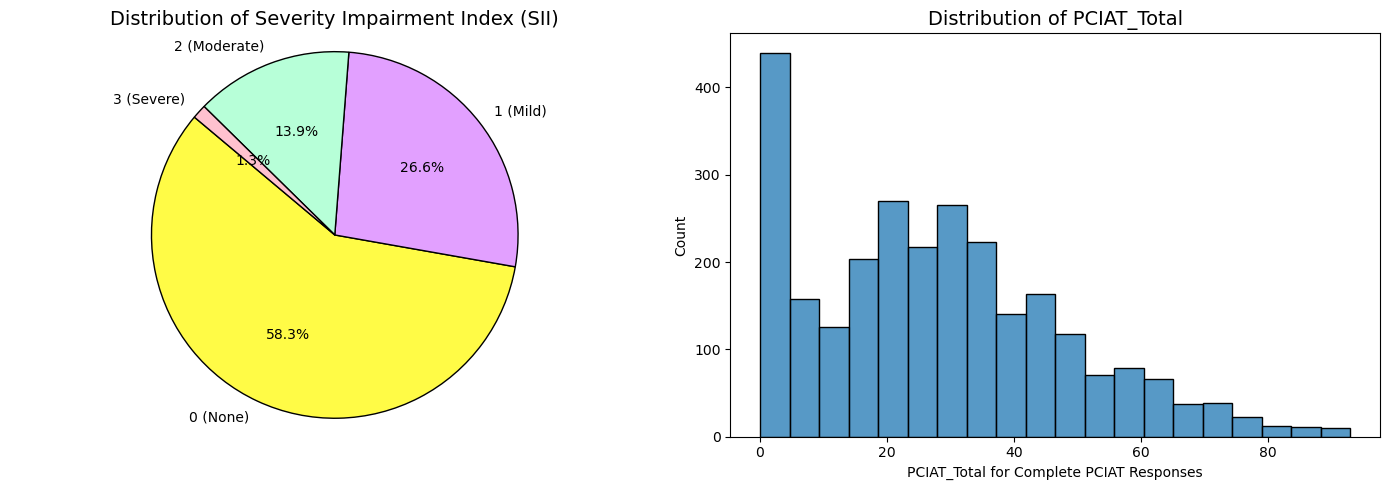

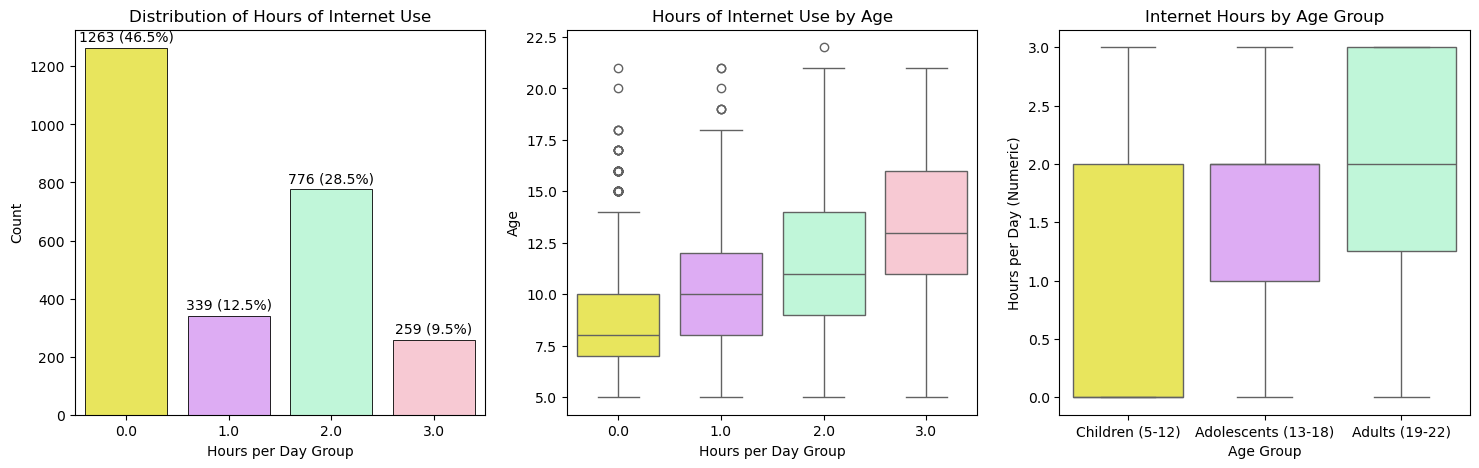

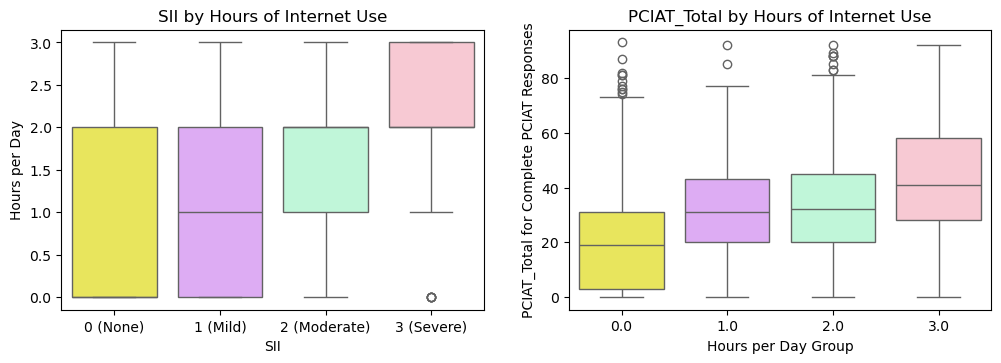

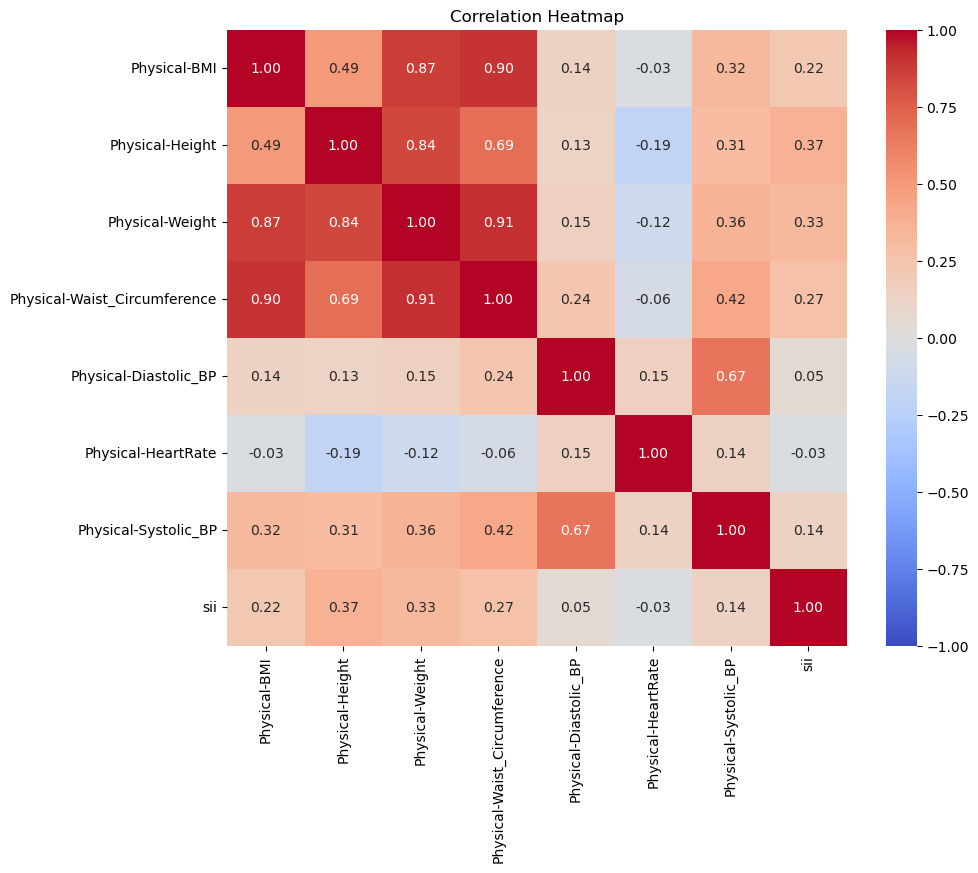

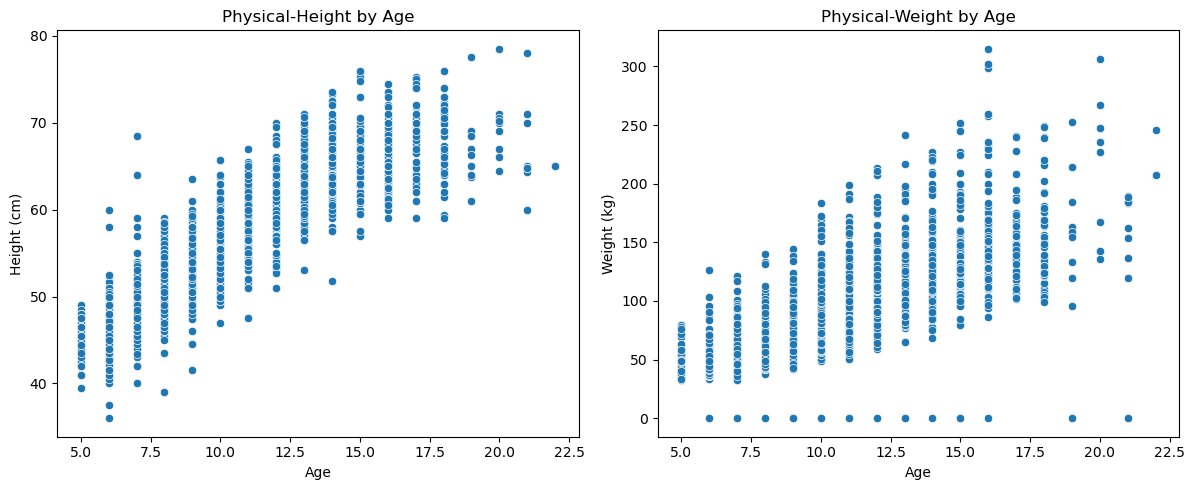

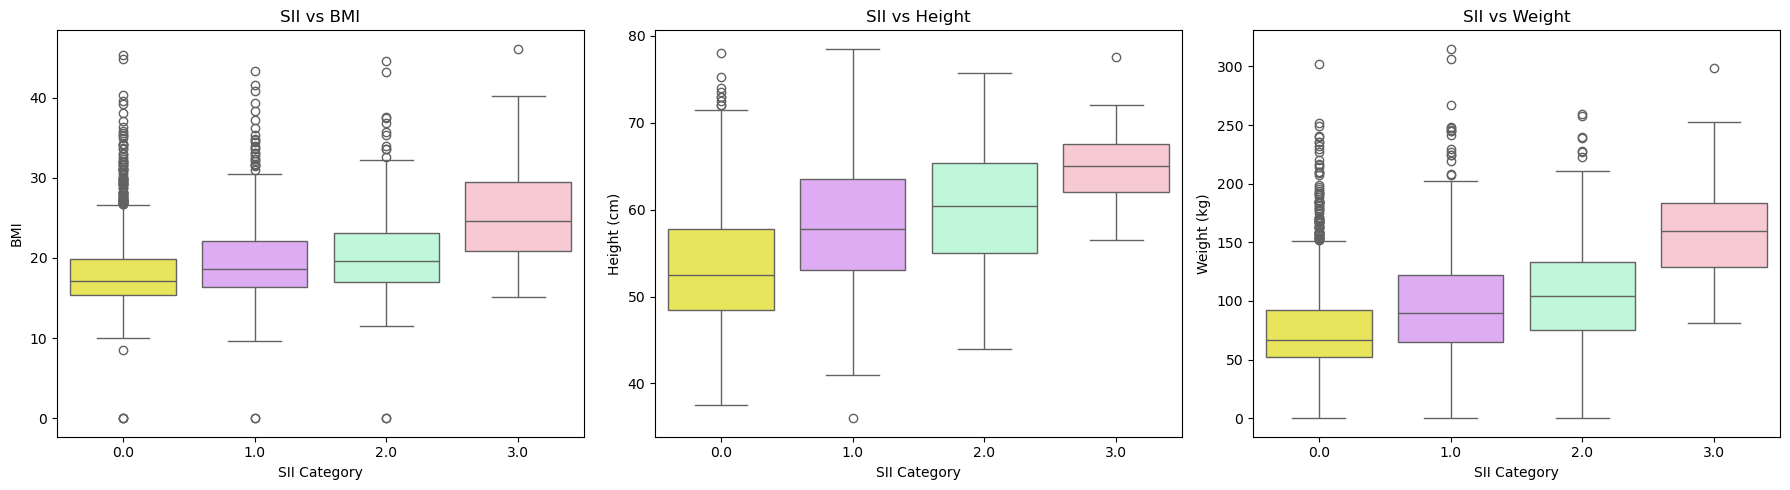

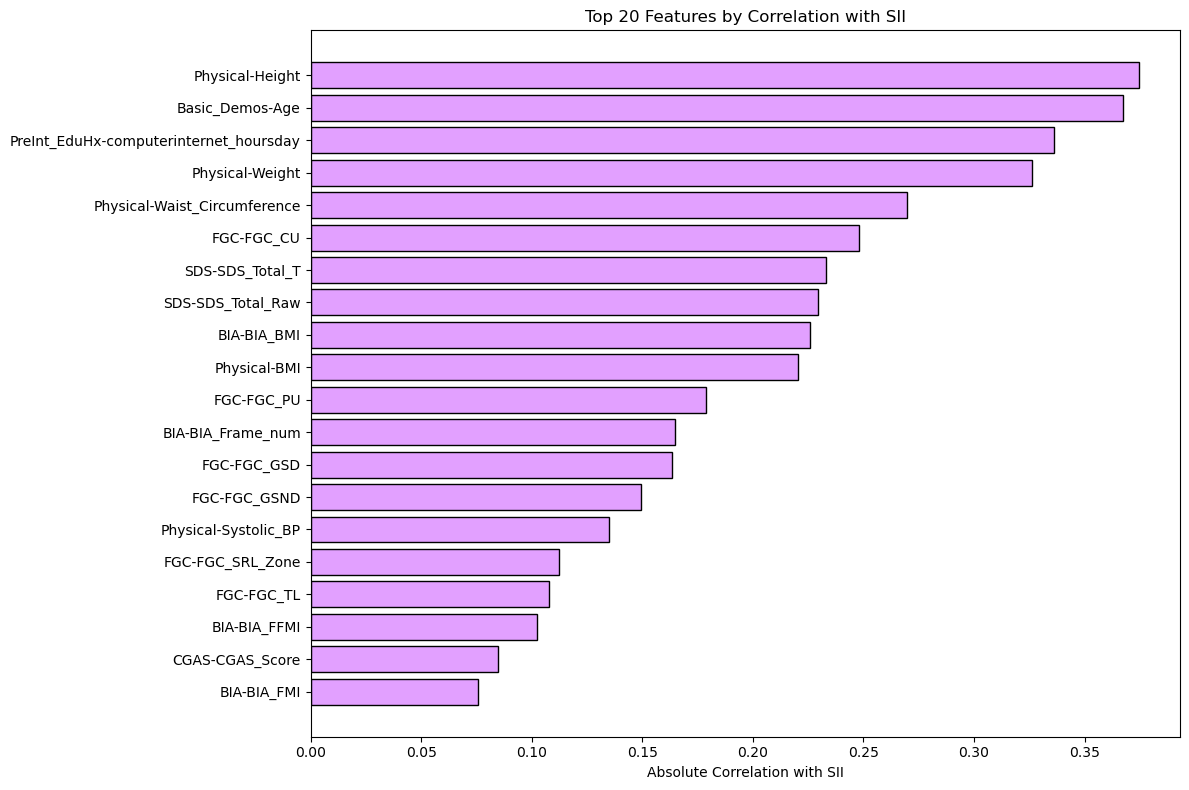

In [5]:
# load pandas
import pandas as pd

# load sample submission
sample = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/sample_submission.csv")

# display sample submission
print("Sample submission")
print(f"Submission shape: {sample.shape}")
sample

# load train set
train = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/train.csv")

# display first 5 rows of train set
print("""Train set: where the 'features' live""")
print(f"Train shape: {train.shape}")
display(train.head())

# load test set
test = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/test.csv")

# display first 5 rows of test set
print("""Test set: what we will evaluate our models on""")
print(f"Test shape: {test.shape}")
display(test.head())

# load data dictionary
data_dict = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/data_dictionary.csv")

# display first 5 rows of data dictionary
print("""Data Dictionary: what each feature means""")
print(f"Data Dictionary shape: {data_dict.shape}")
display(data_dict.head())

# load all libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.api.types import is_numeric_dtype, is_object_dtype, is_categorical_dtype
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from datetime import datetime
import xgboost as xgb
import lightgbm as lgb
import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore", category=RuntimeWarning)

# isolating train-only features
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))

# addind additional information using data dictionary
data_dict[data_dict['Field'].isin(columns_not_in_test)]

# calculate max and min
pciat_min_max = train.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_min_max = pciat_min_max.rename(columns={'min': 'Minimum PCIAT total Score', 'max': 'Maximum total PCIAT Score'})
pciat_min_max

# display range for each level of severity
data_dict[data_dict['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

# display PCIAT results with missing values highlighted
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.map(lambda x: 'background-color: #FFC0CB' if pd.isna(x) else '')

# define PCIAT columns as variable
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]

# recalculate SII function
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

# overwriting SII with recalc_SII
train['sii'] = train['recalc_sii']

# categorizing SII scores by severity and adding "missing" for missing values
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(train[PCIAT_cols].notna().all(axis=1), np.nan)
sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train['sii'] = train['sii'].map(sii_map).fillna('Missing')
sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True)

# dropping recalc_SII column
train.drop(columns='recalc_sii', inplace=True)

# remove rows with missing SII
initial_rows = len(train)
train = train[train['sii'] != 'Missing']
train['sii'] = train['sii'].cat.remove_unused_categories()
removed_rows = initial_rows - len(train)
print(f"Removed {removed_rows} rows with 'Missing' SII values.")
print(f"Train shape: {train.shape}")

# remove duplicate rows
duplicate_count = train.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# define calculate stats function
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

# define variables for plotting
sii_counts = train['sii'].value_counts().reset_index()
sii_counts.columns = ['SII', 'Count']
total = sii_counts['Count'].sum()
sii_counts['percentage'] = (sii_counts['Count'] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# custom color pallete (used throughout)
custom_palette = ['#FFFB46', '#E2A0FF', '#B7FFD8', '#FFC1CF', '#C4F5FC']

axes[0].pie(
    sii_counts['Count'],
    labels=sii_counts['SII'],
    autopct='%1.1f%%',
    colors=custom_palette,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Distribution of Severity Impairment Index (SII)', fontsize=14)
axes[0].axis('equal')  # Equal aspect ratio makes the pie a circle

# PCIAT_Total for complete responses
sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')

plt.tight_layout()
plt.show()

assert train['Basic_Demos-Age'].isna().sum() == 0
assert train['Basic_Demos-Sex'].isna().sum() == 0

# participant age distribution
train['Age Group'] = pd.cut(train['Basic_Demos-Age'], bins=[4, 12, 18, 22], labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)'])
calculate_stats(train, 'Age Group')

# participant sex distribution
sex_map = {0: 'Male', 1: 'Female'}
train['Basic_Demos-Sex'] = train['Basic_Demos-Sex'].map(sex_map)
calculate_stats(train, 'Basic_Demos-Sex')

# SII distribution by age group
stats_age = train.groupby(['Age Group', 'sii'], observed=False).size().unstack(fill_value=0)
stats_age_prop = stats_age.div(stats_age.sum(axis=1), axis=0) * 100
stats_age = stats_age.astype(str) +' (' + stats_age_prop.round(1).astype(str) + '%)'
stats_age

# SII distribution by sex
stats_sex = train.groupby(['Basic_Demos-Sex', 'sii'], observed=False).size().unstack(fill_value=0)
stats_sex_prop = stats_sex.div(stats_sex.sum(axis=1), axis=0) * 100
stats_sex = stats_sex.astype(str) +' (' + stats_sex_prop.round(1).astype(str) + '%)'
stats_sex

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# generate bar graph, distribution of hours of internet use
ax1 = sns.countplot(x='PreInt_EduHx-computerinternet_hoursday', hue='PreInt_EduHx-computerinternet_hoursday', data=train, palette=custom_palette[:4], legend=False, ax=axes[0], edgecolor='black', linewidth=0.6)
axes[0].set_title('Distribution of Hours of Internet Use')
axes[0].set_xlabel('Hours per Day Group')
axes[0].set_ylabel('Count')

total = len(train['PreInt_EduHx-computerinternet_hoursday'])
for p in ax1.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# generate boxplot, hours of internet use by age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['PreInt_EduHx-computerinternet_hoursday'], hue=train['PreInt_EduHx-computerinternet_hoursday'], palette=custom_palette[:4], ax=axes[1], legend=False)
axes[1].set_title('Hours of Internet Use by Age')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Hours per Day Group')

# generate boxplot, internet hours by age group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', hue='Age Group',data=train, palette=custom_palette[:3], ax=axes[2], legend=False)
axes[2].set_title('Internet Hours by Age Group')
axes[2].set_ylabel('Hours per Day (Numeric)')
axes[2].set_xlabel('Age Group');

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# generate boxplot, SII by hours of internet use
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(x='sii', y='PreInt_EduHx-computerinternet_hoursday', hue='sii', data=train, ax=ax1, palette=custom_palette[:4], legend=False)
ax1.set_title('SII by Hours of Internet Use')
ax1.set_ylabel('Hours per Day')
ax1.set_xlabel('SII')

# generate boxplot, PCIAT_Total by hours of internet use
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(x='PreInt_EduHx-computerinternet_hoursday', y='complete_resp_total', hue='PreInt_EduHx-computerinternet_hoursday', data=train, palette=custom_palette[:4], ax=ax2, legend=False)
ax2.set_title('PCIAT_Total by Hours of Internet Use')
ax2.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax2.set_xlabel('Hours per Day Group');

# covert SII values to float
train['sii'] = train['sii'].str[0].astype(float)

# identify physical measures
cols = ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']
data_subset = train[cols + ['sii']]

# generate correlation matrix
corr_matrix = data_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(18, 5))

# physical height by age
plt.subplot(1, 3, 1)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Height', data=train)
plt.title('Physical-Height by Age')
plt.xlabel('Age')
plt.ylabel('Height (cm)')

# physical weight by age
plt.subplot(1, 3, 2)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Weight', data=train)
plt.title('Physical-Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# boxplot: SII vs BMI
sns.boxplot(x='sii', y='Physical-BMI', data=train, hue='sii', ax=axes[0], palette=custom_palette[:4], legend=False)
axes[0].set_title('SII vs BMI')
axes[0].set_xlabel('SII Category')
axes[0].set_ylabel('BMI')

# boxplot: SII vs Height
sns.boxplot(x='sii', y='Physical-Height', data=train, hue='sii', ax=axes[1], palette=custom_palette[:4], legend=False)
axes[1].set_title('SII vs Height')
axes[1].set_xlabel('SII Category')
axes[1].set_ylabel('Height (cm)')

# boxplot: SII vs Weight
sns.boxplot(x='sii', y='Physical-Weight', data=train, hue='sii', ax=axes[2], palette=custom_palette[:4], legend=False)
axes[2].set_title('SII vs Weight')
axes[2].set_xlabel('SII Category')
axes[2].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

# isolate non-PCIAT features
train_subset = train.drop(train.columns[55:76].tolist() + ['complete_resp_total'], axis=1)
numerical_features = train_subset.select_dtypes(include=[np.number]).columns.tolist()

# calculate Pearson correlations with 'sii'
target_correlations = []
for feature in numerical_features:
    if feature != 'sii':
        corr = train_subset[[feature, 'sii']].corr().iloc[0, 1]
        if not np.isnan(corr):
            target_correlations.append((feature, abs(corr)))

# sort and take top 20
top_corr = sorted(target_correlations, key=lambda x: x[1], reverse=True)[:20]
features, corrs = zip(*top_corr)

# plot features
plt.figure(figsize=(12, 8))
plt.barh(range(len(features)), corrs, color='#E2A0FF', edgecolor='black')
plt.yticks(range(len(features)), features)
plt.xlabel('Absolute Correlation with SII')
plt.title('Top 20 Features by Correlation with SII')
plt.gca().invert_yaxis()  # Optional: highest at top
plt.tight_layout()
plt.show()

# remove all PCIAT columns
pciat_cols = [col for col in train.columns if 'PCIAT' in col]
train = train.drop(columns=pciat_cols)

# remove "complete_resp" and "age group" columns
train = train.drop("complete_resp_total", axis=1)
train = train.drop("Age Group", axis=1) 

# remove id column
train = train.drop("id", axis=1)

In [9]:
def detect_column_types(df):
    """Returns lists of numerical and categorical columns"""
    numerical_cols = [col for col in df.columns if is_numeric_dtype(df[col])]
    categorical_cols = [col for col in df.columns if is_object_dtype(df[col]) or is_categorical_dtype(df[col])]
    return numerical_cols, categorical_cols

# Load the data
# Replace 'train_eda copy.csv' with your actual file path


print("Dataset shape:", train.shape)
print("\nFirst few rows:")
print(train.head())
print("\nTarget variable distribution:")
print(train['sii'].value_counts().sort_index())

# Separate features and target
X = train.drop('sii', axis=1)
y = train['sii']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Analyze missing values
print("\nMissing values per column:")
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

# Identify categorical and numerical columns
categorical_cols = []
numerical_cols = []

for col in X.columns:
    if X[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print(f"\nCategorical columns ({len(categorical_cols)}):", categorical_cols)
print(f"Numerical columns ({len(numerical_cols)}):", numerical_cols[:10], "..." if len(numerical_cols) > 10 else "")

# Calculate Pearson correlations with target for numerical features
print("\n" + "="*50)
print("PEARSON CORRELATIONS WITH TARGET (SII)")
print("="*50)

def calculate_correlations(X, y, numerical_cols):
    """Calculate Pearson correlations with target variable"""
    correlations = {}
    for col in numerical_cols:
        # Only calculate correlation for non-missing values
        mask = ~(X[col].isnull() | y.isnull())
        if mask.sum() > 1:  # Need at least 2 non-null values
            corr, p_value = pearsonr(X[col][mask], y[mask])
            correlations[col] = {'correlation': corr, 'p_value': p_value}
    return correlations

correlations = calculate_correlations(X, y, numerical_cols)

# Sort by absolute correlation value
sorted_correlations = sorted(correlations.items(), 
                           key=lambda x: abs(x[1]['correlation']), 
                           reverse=True)

print("\nTop 20 correlations with SII:")
for i, (col, stats) in enumerate(sorted_correlations[:20]):
    print(f"{i+1:2d}. {col:<40} | Corr: {stats['correlation']:6.3f} | p-value: {stats['p_value']:.4f}")

# Feature Engineering Functions
def create_engineered_features(df, correlations=None):
    """Create engineered features from the existing data"""
    df_eng = df.copy()
    
    # BMI-related features
    if 'Physical-BMI' in df_eng.columns and 'BIA-BIA_BMI' in df_eng.columns:
        df_eng['BMI_difference'] = df_eng['Physical-BMI'] - df_eng['BIA-BIA_BMI']
    
    # Fitness ratios
    if 'Fitness_Endurance-Time_Mins' in df_eng.columns and 'Fitness_Endurance-Time_Sec' in df_eng.columns:
        df_eng['Total_Fitness_Time'] = df_eng['Fitness_Endurance-Time_Mins'] * 60 + df_eng['Fitness_Endurance-Time_Sec']
    
    # Body composition ratios
    if 'BIA-BIA_Fat' in df_eng.columns and 'BIA-BIA_FFM' in df_eng.columns:
        df_eng['Fat_to_FFM_ratio'] = df_eng['BIA-BIA_Fat'] / (df_eng['BIA-BIA_FFM'] + 1e-8)
    
    # Physical health composite
    if all(col in df_eng.columns for col in ['Physical-HeartRate', 'Physical-Systolic_BP', 'Physical-Diastolic_BP']):
        # Create a normalized health score (z-score based)
        health_cols = ['Physical-HeartRate', 'Physical-Systolic_BP', 'Physical-Diastolic_BP']
        for col in health_cols:
            if df_eng[col].notna().sum() > 0:
                mean_val = df_eng[col].mean()
                std_val = df_eng[col].std()
                df_eng[f'{col}_normalized'] = (df_eng[col] - mean_val) / (std_val + 1e-8)
    
    # Age-related features
    if 'Basic_Demos-Age' in df_eng.columns:
        df_eng['Age_squared'] = df_eng['Basic_Demos-Age'] ** 2
        df_eng['Age_group'] = pd.cut(df_eng['Basic_Demos-Age'], 
                                   bins=[0, 8, 12, 16, 22], 
                                   labels=['child', 'preteen', 'teen', 'young_adult'])
    
    # Create interaction features based on high correlations (if correlations provided)
    if correlations is not None:
        # Find top correlated features for interaction creation
        top_corr_features = [col for col, stats in sorted(correlations.items(), 
                                                         key=lambda x: abs(x[1]['correlation']), 
                                                         reverse=True)[:10]
                           if col in df_eng.columns]
        
        # Create interaction features between top correlated features
        for i, col1 in enumerate(top_corr_features[:5]):  # Limit to top 5 to avoid explosion
            for col2 in top_corr_features[i+1:5]:  # Create pairs
                if col1 in df_eng.columns and col2 in df_eng.columns:
                    # Only create if both columns are numerical
                    if df_eng[col1].dtype in ['int64', 'float64'] and df_eng[col2].dtype in ['int64', 'float64']:
                        df_eng[f'{col1}_x_{col2}'] = df_eng[col1] * df_eng[col2]
    
    return df_eng

# Apply feature engineering with correlation info
X_engineered = create_engineered_features(X, correlations)

print(f"\nAfter feature engineering: {X_engineered.shape}")
print("New features created:")
new_features = set(X_engineered.columns) - set(X.columns)
for feat in new_features:
    print(f"  - {feat}")

# Update categorical and numerical columns after feature engineering
categorical_cols_eng = []
numerical_cols_eng = []

for col in X_engineered.columns:
    if is_object_dtype(X_engineered[col]) or is_categorical_dtype(X_engineered[col]):
        categorical_cols_eng.append(col)
    elif is_numeric_dtype(X_engineered[col]):
        numerical_cols_eng.append(col)

print(f"\nFinal categorical columns: {len(categorical_cols_eng)}")
print(f"Final numerical columns: {len(numerical_cols_eng)}")

# Check for non-numeric types in numerical columns
for col in numerical_cols_eng:
    if not pd.api.types.is_numeric_dtype(X_engineered[col]):
        print(f"⚠️  Non-numeric column in numerical_cols_eng: {col}, dtype: {X_engineered[col].dtype}")

# Recalculate correlations with engineered features
correlations_eng = calculate_correlations(X_engineered, y, numerical_cols_eng)

# Sort by absolute correlation value
sorted_correlations_eng = sorted(correlations_eng.items(), 
                                key=lambda x: abs(x[1]['correlation']), 
                                reverse=True)

print("\nTop 15 correlations with SII (after feature engineering):")
for i, (col, stats) in enumerate(sorted_correlations_eng[:15]):
    print(f"{i+1:2d}. {col:<40} | Corr: {stats['correlation']:6.3f} | p-value: {stats['p_value']:.4f}")

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Train target distribution:\n{y_train.value_counts().sort_index()}")
print(f"Validation target distribution:\n{y_val.value_counts().sort_index()}")

# RIDGE REGRESSION PREPROCESSING PIPELINE
print("\n" + "="*50)
print("RIDGE REGRESSION PREPROCESSING")
print("="*50)

def select_features_by_correlation(X, y, numerical_cols, threshold=0.05):
    """Select features based on correlation with target"""
    correlations = calculate_correlations(X, y, numerical_cols)
    
    # Select features with absolute correlation above threshold
    selected_features = []
    for col, stats in correlations.items():
        if abs(stats['correlation']) >= threshold and stats['p_value'] < 0.05:
            selected_features.append(col)
    
    return selected_features

def preprocess_for_ridge(X_train, X_val, categorical_cols, numerical_cols, 
                        correlation_threshold=0.05, use_correlation_filtering=True):
    """Preprocessing pipeline for Ridge Regression with correlation-based feature selection"""
    
    # Create copies to avoid modifying original data
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    
    # Handle missing values
    # For numerical: fill with median
    for col in numerical_cols:
        if col in X_train_processed.columns:
            median_val = X_train_processed[col].median()
            X_train_processed[col] = X_train_processed[col].fillna(median_val)
            X_val_processed[col] = X_val_processed[col].fillna(median_val)
    
    # For categorical: fill with mode
    for col in categorical_cols:
        if col in X_train_processed.columns:
            mode_val = X_train_processed[col].mode()[0] if not X_train_processed[col].mode().empty else 'Unknown'
            X_train_processed[col] = X_train_processed[col].fillna(mode_val)
            X_val_processed[col] = X_val_processed[col].fillna(mode_val)
    
    # Feature selection based on correlation (for Ridge only)
    selected_numerical_features = numerical_cols
    if use_correlation_filtering:
        selected_numerical_features = select_features_by_correlation(
            X_train_processed, y_train, numerical_cols, correlation_threshold
        )
        
        print(f"Selected {len(selected_numerical_features)} numerical features out of {len(numerical_cols)} based on correlation > {correlation_threshold}")
        print("Selected features:", selected_numerical_features[:10], "..." if len(selected_numerical_features) > 10 else "")
        
        # Keep only selected numerical features
        features_to_keep = selected_numerical_features + categorical_cols
        X_train_processed = X_train_processed[features_to_keep]
        X_val_processed = X_val_processed[features_to_keep]
    
    # One-hot encode categorical variables
    X_train_encoded = pd.get_dummies(X_train_processed, columns=categorical_cols, drop_first=True)
    X_val_encoded = pd.get_dummies(X_val_processed, columns=categorical_cols, drop_first=True)
    
    # Ensure both sets have the same columns
    missing_cols_val = set(X_train_encoded.columns) - set(X_val_encoded.columns)
    missing_cols_train = set(X_val_encoded.columns) - set(X_train_encoded.columns)
    
    for col in missing_cols_val:
        X_val_encoded[col] = 0
    for col in missing_cols_train:
        X_train_encoded[col] = 0
    
    # Reorder columns to match
    X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_val_scaled = scaler.transform(X_val_encoded)
    
    return X_train_scaled, X_val_scaled, scaler, X_train_encoded.columns, selected_numerical_features

# Experiment with different correlation thresholds for Ridge
correlation_thresholds = [0.01, 0.03, 0.05, 0.1]
ridge_results = {}

print("\nTesting different correlation thresholds for Ridge:")
for threshold in correlation_thresholds:
    print(f"\n--- Testing threshold: {threshold} ---")
    
    # Preprocess for Ridge with correlation filtering
    X_train_ridge, X_val_ridge, ridge_scaler, ridge_columns, selected_features = preprocess_for_ridge(
        X_train, X_val, categorical_cols_eng, numerical_cols_eng, 
        correlation_threshold=threshold, use_correlation_filtering=True
    )
    
    print(f"Ridge - Train shape after preprocessing: {X_train_ridge.shape}")
    
    # Train Ridge Regression
    ridge_model = Ridge(alpha=1.0, random_state=42)
    ridge_model.fit(X_train_ridge, y_train)
    
    # Predictions and evaluation
    y_train_pred_ridge = ridge_model.predict(X_train_ridge)
    y_val_pred_ridge = ridge_model.predict(X_val_ridge)
    
    ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
    ridge_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
    
    ridge_results[threshold] = {
        'train_rmse': ridge_train_rmse,
        'val_rmse': ridge_val_rmse,
        'num_features': X_train_ridge.shape[1],
        'selected_features': selected_features
    }
    
    print(f"Train RMSE: {ridge_train_rmse:.4f}")
    print(f"Validation RMSE: {ridge_val_rmse:.4f}")

# Also test Ridge without correlation filtering
print(f"\n--- Testing without correlation filtering ---")
X_train_ridge_no_filter, X_val_ridge_no_filter, ridge_scaler_no_filter, ridge_columns_no_filter, _ = preprocess_for_ridge(
    X_train, X_val, categorical_cols_eng, numerical_cols_eng, 
    use_correlation_filtering=False
)

print(f"Ridge - Train shape after preprocessing: {X_train_ridge_no_filter.shape}")

ridge_model_no_filter = Ridge(alpha=1.0, random_state=42)
ridge_model_no_filter.fit(X_train_ridge_no_filter, y_train)

y_train_pred_ridge_no_filter = ridge_model_no_filter.predict(X_train_ridge_no_filter)
y_val_pred_ridge_no_filter = ridge_model_no_filter.predict(X_val_ridge_no_filter)

ridge_train_rmse_no_filter = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge_no_filter))
ridge_val_rmse_no_filter = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge_no_filter))

ridge_results['no_filter'] = {
    'train_rmse': ridge_train_rmse_no_filter,
    'val_rmse': ridge_val_rmse_no_filter,
    'num_features': X_train_ridge_no_filter.shape[1],
    'selected_features': None
}

print(f"Train RMSE: {ridge_train_rmse_no_filter:.4f}")
print(f"Validation RMSE: {ridge_val_rmse_no_filter:.4f}")

# Select best Ridge configuration
best_ridge_config = min(ridge_results.items(), key=lambda x: x[1]['val_rmse'])
print(f"\nBest Ridge configuration: {best_ridge_config[0]} (Validation RMSE: {best_ridge_config[1]['val_rmse']:.4f})")

# Use the best configuration for final Ridge model
if best_ridge_config[0] == 'no_filter':
    X_train_ridge_final, X_val_ridge_final = X_train_ridge_no_filter, X_val_ridge_no_filter
    ridge_model_final = ridge_model_no_filter
    final_ridge_train_rmse, final_ridge_val_rmse = ridge_train_rmse_no_filter, ridge_val_rmse_no_filter
else:
    X_train_ridge_final, X_val_ridge_final, _, _, _ = preprocess_for_ridge(
        X_train, X_val, categorical_cols_eng, numerical_cols_eng, 
        correlation_threshold=best_ridge_config[0], use_correlation_filtering=True
    )
    ridge_model_final = Ridge(alpha=1.0, random_state=42)
    ridge_model_final.fit(X_train_ridge_final, y_train)
    
    y_train_pred_final = ridge_model_final.predict(X_train_ridge_final)
    y_val_pred_final = ridge_model_final.predict(X_val_ridge_final)
    
    final_ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_final))
    final_ridge_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_final))

# LIGHTGBM PREPROCESSING PIPELINE
print("\n" + "="*50)
print("LIGHTGBM PREPROCESSING")
print("="*50)

def preprocess_for_lightgbm(X_train, X_val, categorical_cols, numerical_cols):
    """Preprocessing pipeline for LightGBM"""
    
    # Create copies
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    
    # Handle missing values
    # For numerical: fill with median
    for col in numerical_cols:
        if col in X_train_processed.columns:
            median_val = X_train_processed[col].median()
            X_train_processed[col] = X_train_processed[col].fillna(median_val)
            X_val_processed[col] = X_val_processed[col].fillna(median_val)
    
    # Label encode categorical variables
    label_encoders = {}
    for col in categorical_cols:
        if col in X_train_processed.columns:
            le = LabelEncoder()
            
            # Fill missing values first
            mode_val = X_train_processed[col].mode()[0] if not X_train_processed[col].mode().empty else 'Unknown'
            X_train_processed[col] = X_train_processed[col].fillna(mode_val)
            X_val_processed[col] = X_val_processed[col].fillna(mode_val)

        # Fit on train data
            X_train_processed[col] = le.fit_transform(X_train_processed[col]).astype(int)

        # Handle unseen categories in validation
            train_categories = set(le.classes_)
            X_val_processed[col] = X_val_processed[col].map(
                lambda x: le.transform([x])[0] if x in train_categories else 0
            ).astype(int)

        # Handle unseen categories in validation
            train_categories = set(le.classes_)
            X_val_processed[col] = X_val_processed[col].map(
                lambda x: le.transform([x])[0] if x in train_categories else 0
            )

            label_encoders[col] = le
    
    return X_train_processed, X_val_processed, label_encoders

# Preprocess for LightGBM
X_train_lgb, X_val_lgb, lgb_encoders = preprocess_for_lightgbm(
    X_train, X_val, categorical_cols_eng, numerical_cols_eng
)

categorical_feature_names = [col for col in categorical_cols_eng if col in X_train_lgb.columns]

print(f"LightGBM - Train shape after preprocessing: {X_train_lgb.shape}")
print(f"LightGBM - Validation shape after preprocessing: {X_val_lgb.shape}")

# Train LightGBM
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# Create LightGBM datasets
train_data = lgb.Dataset(X_train_lgb, label=y_train, categorical_feature=categorical_feature_names)
val_data = lgb.Dataset(X_val_lgb, label=y_val, reference=train_data, categorical_feature=categorical_feature_names)

# Train model
lgb_model = lgb.train(
    lgb_params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
)

# Predictions and evaluation
y_train_pred_lgb = lgb_model.predict(X_train_lgb, num_iteration=lgb_model.best_iteration)
y_val_pred_lgb = lgb_model.predict(X_val_lgb, num_iteration=lgb_model.best_iteration)

lgb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))
lgb_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_lgb))

print(f"\nLightGBM Results:")
print(f"Train RMSE: {lgb_train_rmse:.4f}")
print(f"Validation RMSE: {lgb_val_rmse:.4f}")

# FINAL COMPARISON
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

print("Ridge Regression Feature Selection Results:")
for config, results in ridge_results.items():
    print(f"  {config}: Val RMSE = {results['val_rmse']:.4f}, Features = {results['num_features']}")

print(f"\nFinal Ridge Regression (Best Config: {best_ridge_config[0]}):")
print(f"  Train RMSE: {final_ridge_train_rmse:.4f}")
print(f"  Validation RMSE: {final_ridge_val_rmse:.4f}")
print(f"  Overfitting: {final_ridge_val_rmse - final_ridge_train_rmse:.4f}")

print(f"\nLightGBM (All Features):")
print(f"  Train RMSE: {lgb_train_rmse:.4f}")
print(f"  Validation RMSE: {lgb_val_rmse:.4f}")
print(f"  Overfitting: {lgb_val_rmse - lgb_train_rmse:.4f}")

# Feature importance for LightGBM
print(f"\nTop 10 Most Important Features (LightGBM):")
feature_importance = lgb_model.feature_importance(importance_type='gain')
feature_names = X_train_lgb.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(importance_df.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<40} | Importance: {row['importance']:8.0f}")

# Show which features were selected for Ridge (if correlation filtering was used)
if best_ridge_config[0] != 'no_filter':
    print(f"\nFeatures selected for Ridge (correlation > {best_ridge_config[0]}):")
    selected_features = best_ridge_config[1]['selected_features']
    for i, feat in enumerate(selected_features[:15]):  # Show first 15
        corr_val = correlations_eng.get(feat, {}).get('correlation', 0)
        print(f"{i+1:2d}. {feat:<40} | Corr: {corr_val:6.3f}")
    if len(selected_features) > 15:
        print(f"... and {len(selected_features) - 15} more features")

print("\n" + "="*50)
print("FEATURE SELECTION INSIGHTS")
print("="*50)

print("Key Findings:")
print("1. Ridge Performance by Feature Selection:")
for config, results in sorted(ridge_results.items(), key=lambda x: x[1]['val_rmse']):
    improvement = ""
    if config != 'no_filter':
        baseline = ridge_results['no_filter']['val_rmse']
        change = baseline - results['val_rmse']
        improvement = f" (Δ: {change:+.4f})"
    print(f"   - {config}: {results['val_rmse']:.4f} with {results['num_features']} features{improvement}")

print("\n2. Model Comparison:")
print(f"   - Best Ridge: {final_ridge_val_rmse:.4f} RMSE")
print(f"   - LightGBM: {lgb_val_rmse:.4f} RMSE")
if final_ridge_val_rmse < lgb_val_rmse:
    print("   → Ridge performs better (likely benefits from feature selection)")
else:
    print("   → LightGBM performs better (likely benefits from non-linear patterns)")

print("\n3. Overfitting Analysis:")
ridge_overfit = final_ridge_val_rmse - final_ridge_train_rmse
lgb_overfit = lgb_val_rmse - lgb_train_rmse
print(f"   - Ridge overfitting: {ridge_overfit:.4f}")
print(f"   - LightGBM overfitting: {lgb_overfit:.4f}")
if ridge_overfit < lgb_overfit:
    print("   → Ridge is more robust (less overfitting)")
else:
    print("   → LightGBM is more robust (less overfitting)")

print("\n" + "="*50)
print("READY FOR HYPERPARAMETER TUNING!")
print("="*50)

Dataset shape: (2719, 59)

First few rows:
  Basic_Demos-Enroll_Season  Basic_Demos-Age Basic_Demos-Sex CGAS-Season  \
0                      Fall                5            Male      Winter   
1                    Summer                9            Male         NaN   
2                    Summer               10          Female        Fall   
3                    Winter                9            Male        Fall   
5                    Spring               13          Female      Winter   

   CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0             51.0            Fall     16.877316             46.0   
1              NaN            Fall     14.035590             48.0   
2             71.0            Fall     16.648696             56.5   
3             71.0          Summer     18.292347             56.0   
5             50.0          Summer     22.279952             59.5   

   Physical-Weight  Physical-Waist_Circumference  ...  PAQ_A-Season  \
0             

/var/folders/lr/gr8hcf2s18v764jtt74lh8cm0000gn/T/ipykernel_96984/2187378001.py:135: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_object_dtype(X_engineered[col]) or is_categorical_dtype(X_engineered[col]):



Final categorical columns: 12
Final numerical columns: 64

Top 15 correlations with SII (after feature engineering):
 1. Basic_Demos-Age_x_PreInt_EduHx-computerinternet_hoursday | Corr:  0.380 | p-value: 0.0000
 2. Physical-Height                          | Corr:  0.374 | p-value: 0.0000
 3. Physical-Height_x_Basic_Demos-Age        | Corr:  0.374 | p-value: 0.0000
 4. Basic_Demos-Age_x_Physical-Waist_Circumference | Corr:  0.372 | p-value: 0.0000
 5. Basic_Demos-Age                          | Corr:  0.368 | p-value: 0.0000
 6. Physical-Height_x_PreInt_EduHx-computerinternet_hoursday | Corr:  0.359 | p-value: 0.0000
 7. PreInt_EduHx-computerinternet_hoursday_x_Physical-Weight | Corr:  0.357 | p-value: 0.0000
 8. Age_squared                              | Corr:  0.346 | p-value: 0.0000
 9. Physical-Height_x_Physical-Waist_Circumference | Corr:  0.345 | p-value: 0.0000
10. Physical-Height_x_Physical-Weight        | Corr:  0.340 | p-value: 0.0000
11. Basic_Demos-Age_x_Physical-Weight     